Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime


import matplotlib.pyplot as plt
plt.style.use('ggplot') 
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout


In [3]:
#read the file
df = pd.read_csv("/home/rupeek/Desktop/ML &AI/assns/archive (2)/INFY.csv")

#print the head
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
5,2000-01-10,INFOSYSTCH,EQ,13125.50,13125.50,14175.50,12075.50,13750.00,13757.30,13270.60,236175,3.134185e+14,NaN,NaN,NaN
6,2000-01-11,INFOSYSTCH,EQ,13757.30,13200.00,13800.00,12656.75,12656.75,12656.75,12885.28,122331,1.576270e+14,NaN,NaN,NaN
7,2000-01-12,INFOSYSTCH,EQ,12656.75,11950.00,13349.00,11766.00,13010.00,13077.55,12873.99,203074,2.614373e+14,NaN,NaN,NaN
8,2000-01-13,INFOSYSTCH,EQ,13077.55,13100.00,13149.00,12031.35,12033.00,12090.60,12529.38,156550,1.961475e+14,NaN,NaN,NaN
9,2000-01-14,INFOSYSTCH,EQ,12090.60,12249.00,12297.00,11203.00,12170.00,12176.40,11896.77,125313,1.490820e+14,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5163 entries, 0 to 5162
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5163 non-null   object 
 1   Symbol              5163 non-null   object 
 2   Series              5163 non-null   object 
 3   Prev Close          5163 non-null   float64
 4   Open                5163 non-null   float64
 5   High                5163 non-null   float64
 6   Low                 5163 non-null   float64
 7   Last                5163 non-null   float64
 8   Close               5163 non-null   float64
 9   VWAP                5163 non-null   float64
 10  Volume              5163 non-null   int64  
 11  Turnover            5163 non-null   float64
 12  Trades              2313 non-null   float64
 13  Deliverable Volume  4654 non-null   float64
 14  %Deliverble         4654 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 605.2

In [5]:
df.dtypes


Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [6]:
#Checking out the statistical measures
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5.163000e+03,5.163000e+03,2.313000e+03,4.654000e+03,4654.000000
mean,2621.534447,2621.765417,2664.057951,2575.324056,2618.689754,2618.927532,2619.816692,2.426796e+06,3.631251e+14,1.057476e+05,1.480748e+06,0.537852
std,1807.294645,1807.277286,1853.127735,1753.074868,1799.712068,1799.895995,1803.471210,3.993306e+06,3.450021e+14,8.644457e+04,2.201308e+06,0.181301
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,1.350000e+03,4.352000e+03,0.045800
25%,1232.275000,1230.250000,1249.825000,1210.175000,1231.075000,1231.975000,1229.995000,7.057665e+05,2.047240e+14,5.774300e+04,3.971070e+05,0.457500
50%,2310.900000,2310.000000,2331.000000,2278.000000,2307.800000,2309.200000,2306.990000,1.171916e+06,2.859783e+14,8.517100e+04,7.714900e+05,0.583900
75%,3205.000000,3210.000000,3249.000000,3163.625000,3203.600000,3204.550000,3207.645000,2.547099e+06,4.150800e+14,1.259550e+05,1.825520e+06,0.666100
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


Feature Engineering¶


In [7]:
#Creating a copy
df_analysis=df.copy()

#Coverting date column to datetime data type
df_analysis['Date'] = df_analysis['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
df_analysis["Month"] = df_analysis.Date.dt.month
df_analysis["Week"] = df_analysis.Date.dt.week
df_analysis["Day"] = df_analysis.Date.dt.day
df_analysis["Day of week"] = df_analysis.Date.dt.dayofweek


#Setting date column as index
df_analysis.set_index("Date", drop=False, inplace=True)
df_analysis.iloc[:,15:19].head()

,Month,Week,Day,Day of week
Date,,,,
2000-01-03,1,1,3,0
2000-01-04,1,1,4,1
2000-01-05,1,1,5,2
2000-01-06,1,1,6,3
2000-01-07,1,1,7,4


Data Cleaning

In [8]:
#Imputing null values with mean 
df_analysis.fillna(df_analysis.mean(),inplace=True)

#Checking for null values
df_analysis.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Month                 0
Week                  0
Day                   0
Day of week           0
dtype: int64

Performing Exploratory Data Analysis

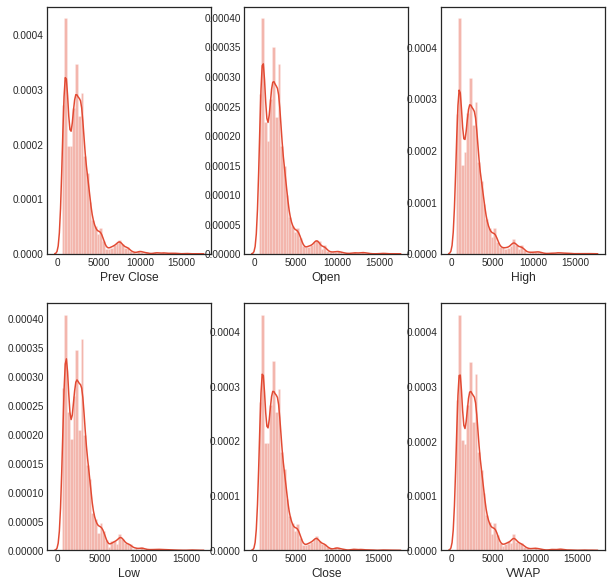

In [9]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Subplots of distplot
plt.subplot(231)
sns.distplot(df_analysis['Prev Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df_analysis['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df_analysis['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df_analysis['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df_analysis['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df_analysis['VWAP'])
fig = plt.gcf()
fig.set_size_inches(10,10)

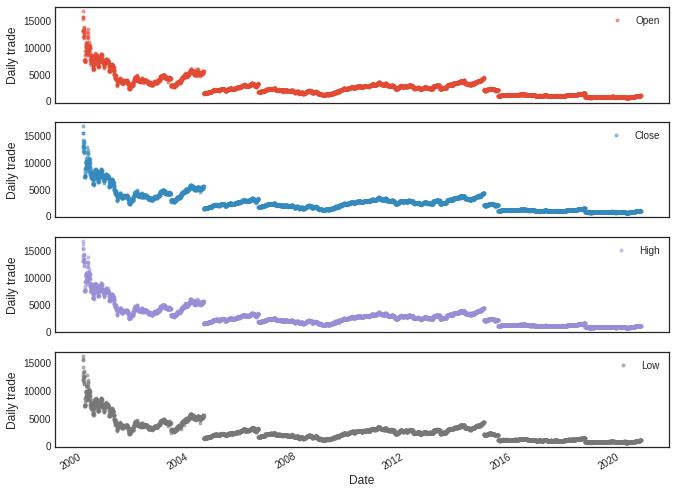

In [10]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df_analysis[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Data Transformation

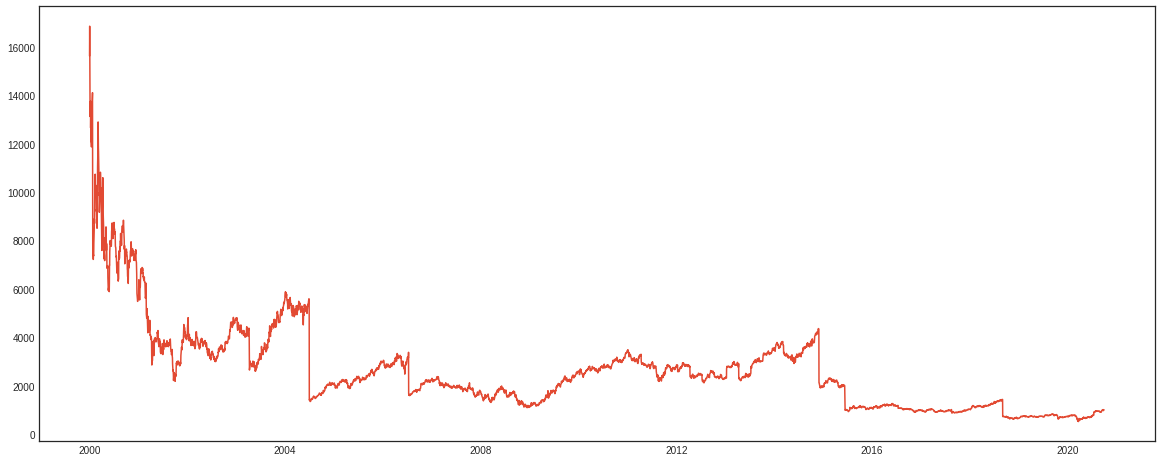

In [13]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y/%m/%d')
df.index = df['Date']

#plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Historical Close Price')

In [14]:
features = ["Date", "Close"]
all_data = df[features]

In [15]:
#setting index
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

In [16]:
all_data.head()


,Close
Date,
2000-01-03,15625.20
2000-01-04,16855.90
2000-01-05,15507.45
2000-01-06,14266.85
2000-01-07,13125.50


In [17]:
all_data.shape


(5163, 1)

Non randomized Train-Test Split to preserve Serial Nature

In [18]:
#creating training and validation sets
dataset = all_data.values

train = dataset[0:4500,:]
valid = dataset[4500:,:]

Scaling

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [20]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [21]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Building and Training a Stacked LSTM(Long Short Term Memory) Recurrent Neural Network

In [23]:
 #create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [25]:
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100
69/69 [==============================] - 9s 126ms/step - loss: 0.0027
Epoch 2/100
69/69 [==============================] - 9s 134ms/step - loss: 7.3748e-04
Epoch 3/100
69/69 [==============================] - 9s 125ms/step - loss: 6.5983e-04
Epoch 4/100
69/69 [==============================] - 9s 125ms/step - loss: 5.9726e-04
Epoch 5/100
69/69 [==============================] - 9s 126ms/step - loss: 5.8543e-04
Epoch 6/100
69/69 [==============================] - 10s 142ms/step - loss: 5.4327e-04
Epoch 7/100
69/69 [==============================] - 9s 133ms/step - loss: 5.1199e-04
Epoch 8/100
69/69 [==============================] - 9s 136ms/step - loss: 4.9979e-04
Epoch 9/100
69/69 [==============================] - 10s 140ms/step - loss: 4.5119e-04
Epoch 10/100
69/69 [==============================] - 9s 133ms/step - loss: 4.0740e-04
Epoch 11/100
69/69 [==============================] - 10s 148ms/step - loss: 3.9608e-04
Epoch 12/100
69/69 [==============================] -

In [26]:
#predicting test data values, using past 90 from the train data
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [27]:
inputs.shape


(753, 1)

In [28]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

In [29]:
X_test.shape


(663, 90)

In [30]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

Root Mean Square Evaluation¶


In [31]:
rms=np.sqrt(np.mean(np.power((valid-preds),2)))
print(f"Root Mean Square Error:{rms}")

Root Mean Square Error:54.77473905265909


Visualize Prediction using matplotlib¶


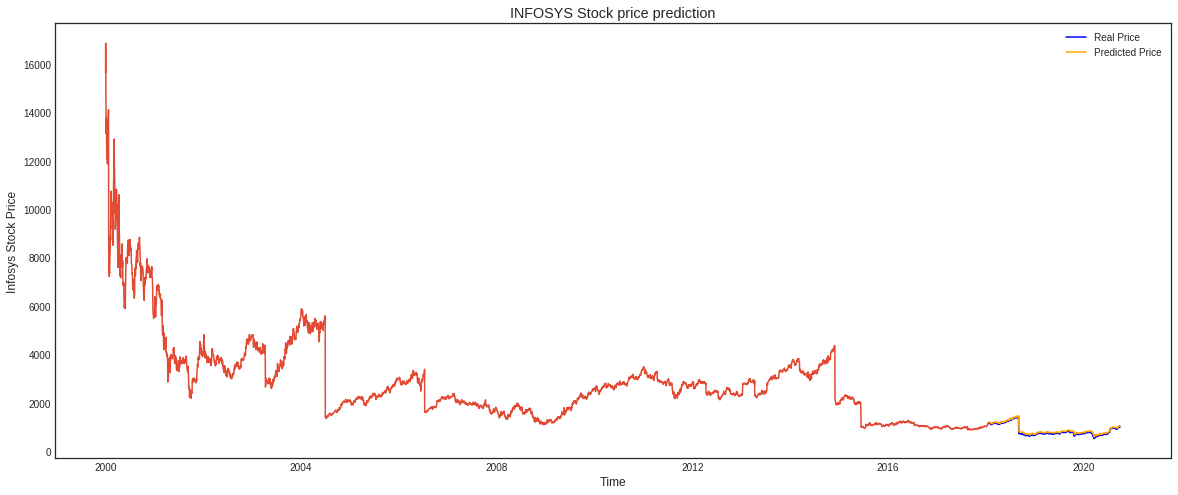

In [32]:
#for plotting
train = all_data[0:4500]
valid = all_data[4500:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'orange', label = 'Predicted Price')
plt.title('INFOSYS Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()

Clear Visualisation¶


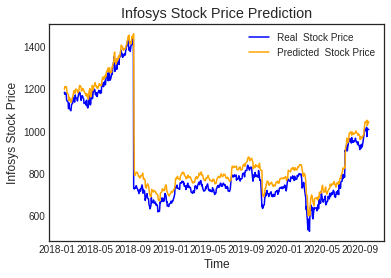

In [34]:
# Visualising the results
plt.plot(valid['Close'], color = 'blue', label = 'Real  Stock Price')
plt.plot(valid['Predictions'], color = 'orange', label = 'Predicted  Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()
